In [3]:
# local imports
from experiments import run_experiment, multi_trail_experiment
from utils import running_mean

# global imports
import matplotlib.pyplot as plt
import numpy as np
import gym
#import gym_toytext

In [4]:
default_config = {"num_episodes": 1000,
                  "num_trails": 5,
                  "q_discount_factor": 1.0,
                  "q_alpha": 0.1,
                  "q_epsilon": 0.1,
                  "q_decay_rate":1.0,
                  "dq_discount_factor": 1.0,
                  "dq_alpha": 0.1,
                  "dq_epsilon": 0.1,
                  "dq_decay_rate":1.0,}

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 19532.62it/s]


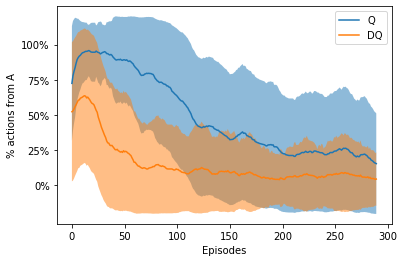

In [77]:
from BiasMDP import BiasMDP

env_name = 'BiasMDP'
environment  = BiasMDP()

config = default_config.copy()
config["num_episodes"] = 300
config["num_trails"] = 50

results = multi_trail_experiment(env_name, environment, config)

smooth = 10
for j in list(results.keys()):
    mean = running_mean(results[j]['episode_length'][0], smooth)
    std = running_mean(results[j]['episode_length'][1], smooth)
    plt.plot(mean, label=f"{j}")
    plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.5)
plt.legend()
plt.ylabel("% actions from A")
plt.xlabel("Episodes")
plt.yticks([1,1.25,1.5,1.75,2], ["0%", "25%", "50%", "75%", "100%"])
plt.savefig(f'figures/{env_name}.pdf', dpi=300)  
plt.show()

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████████████████████████████████| 2000/2000 [00:12<00:00, 155.83it/s]


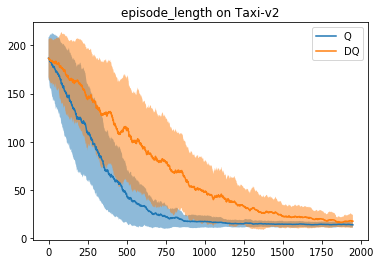

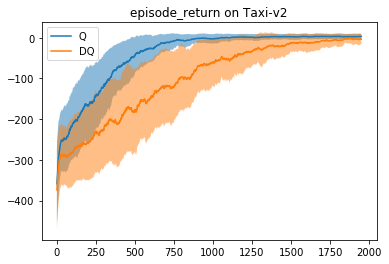

In [81]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 2000
config["num_trails"] = 5

#config["q_alpha"] = 0.2
#config["dq_alpha"] = 0.2

results = multi_trail_experiment(env_name, environment, config)

smooth = 50
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|████████████████████████████████████| 25000/25000 [00:34<00:00, 721.92it/s]


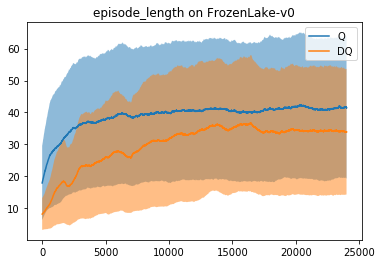

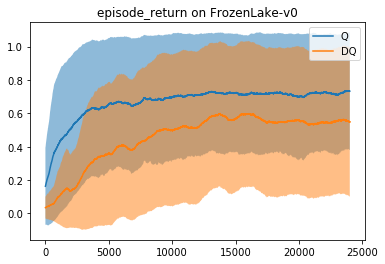

In [62]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 25000
config["num_trails"] = 5

config["q_discount_factor"] = 0.95
config["dq_discount_factor"] = 0.95

# Agents perform better with epsilon decay
# (taking random actions adds even more chances to mess up in addition to stochasticity of actions)

#config["q_epsilon"] = 0.5
#config["dq_epsilon"] = 0.5
config["q_decay_rate"] = 0.9995
config["dq_decay_rate"] = 0.9995

results = multi_trail_experiment(env_name, environment, config)

smooth = 1000
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|███████████████████████████████████████| 160/160 [00:00<00:00, 5438.45it/s]


100%|███████████████████████████████████████| 160/160 [00:00<00:00, 8212.75it/s]


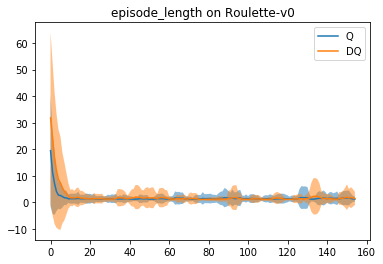

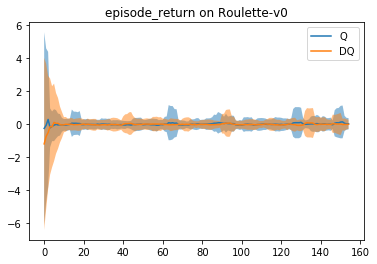

In [66]:
env_name = 'Roulette-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 160
config["num_trails"] = 50

#config["q_epsilon"] = 1
#config["dq_epsilon"] = 1
#config["q_decay_rate"] = 0.99
#config["dq_decay_rate"] = 0.99

# Reward signal should not propagate to past actions, only immediate reward should be considered

config['q_discount_factor'] = 0
config['dq_discount_factor'] = 0

results = multi_trail_experiment(env_name, environment, config)

smooth = 5
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 7784.77it/s]


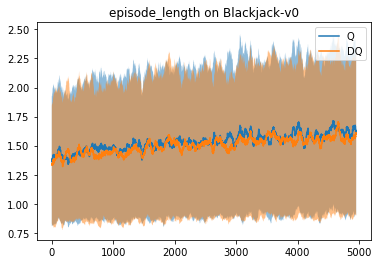

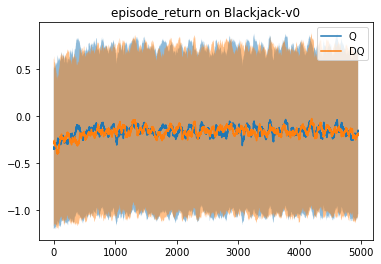

In [79]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 5000
config["num_trails"] = 10

#config["q_alpha"] = 0.0001
#config["dq_alpha"] = 0.0001

#config["q_epsilon"] = 0.5
#config["dq_epsilon"] = 0.5
#config["q_decay_rate"] = 0.995
#config["dq_decay_rate"] = 0.995

results = multi_trail_experiment(env_name, environment, config)

smooth = 50
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()